##### CAPSTONE PROJECT

###### Problem statement: 
A house value is simply more than location and square footage. Like the features that make 
up a person, an educated party would want to know all aspects that give a house its value. For 
example, you want to sell a house and you don’t know the price which you can take — it can’t 
be too low or too high. To find house price you usually try to find similar properties in your 
neighbourhood and based on gathered data you will try to assess your house price

In [1]:
%matplotlib inline
# all the basic libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
# pre-processing method
from sklearn.model_selection import train_test_split

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#pyod models
from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from joblib import dump, load

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

###### Reading the data

In [2]:
caps_df = pd.read_csv('innercity.csv')

In [3]:
caps_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


###### Exploring the given dataset

In [4]:
caps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [5]:
caps_df.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [6]:
caps_df.shape

(21613, 23)

In [7]:
caps_df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [8]:
for value in ['cid','dayhours','price','room_bed','room_bath','living_measure','lot_measure','ceil','coast','sight','condition','quality','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat','long','living_measure15','lot_measure15','furnished','total_area']:
    print(value,":",sum(caps_df[value] == '?'))

cid : 0
dayhours : 0
price : 0
room_bed : 0
room_bath : 0
living_measure : 0
lot_measure : 0
ceil : 0
coast : 0
sight : 0
condition : 0
quality : 0
ceil_measure : 0
basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
living_measure15 : 0
lot_measure15 : 0
furnished : 0
total_area : 0


In [9]:
caps_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


###### Data Visualization

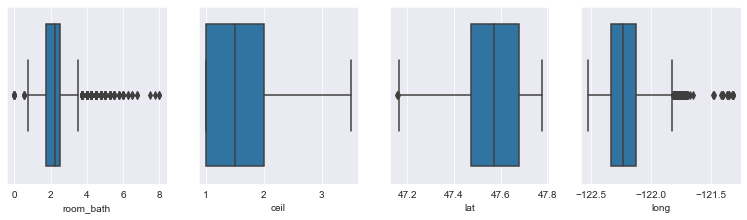

In [10]:
numeric_col = caps_df.columns[pd.Series(caps_df.columns).apply(lambda x : caps_df[x].dtype == 'float64')]  # Non object columns

plt.figure(figsize = (20,15))

j = 1
for i in numeric_col:
    plt.subplot(4,6,j)
    sns.boxplot(caps_df[i])
    j += 1

<AxesSubplot:xlabel='price'>

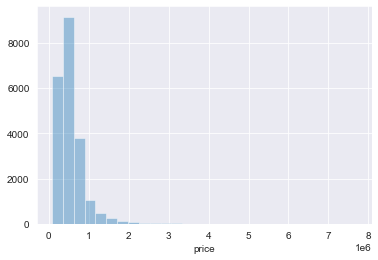

In [11]:
#pd.value_counts(caps_df["price"]).plot(kind="bar")
sns.distplot(caps_df['price'],kde=False, bins=28)

<AxesSubplot:xlabel='ceil', ylabel='room_bed'>

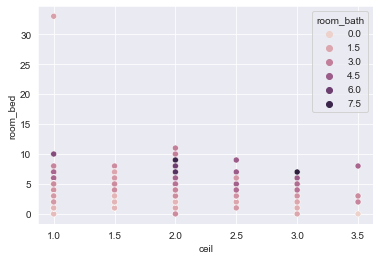

In [12]:
sns.scatterplot(caps_df['ceil'], caps_df['room_bed'],caps_df['room_bath'])

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

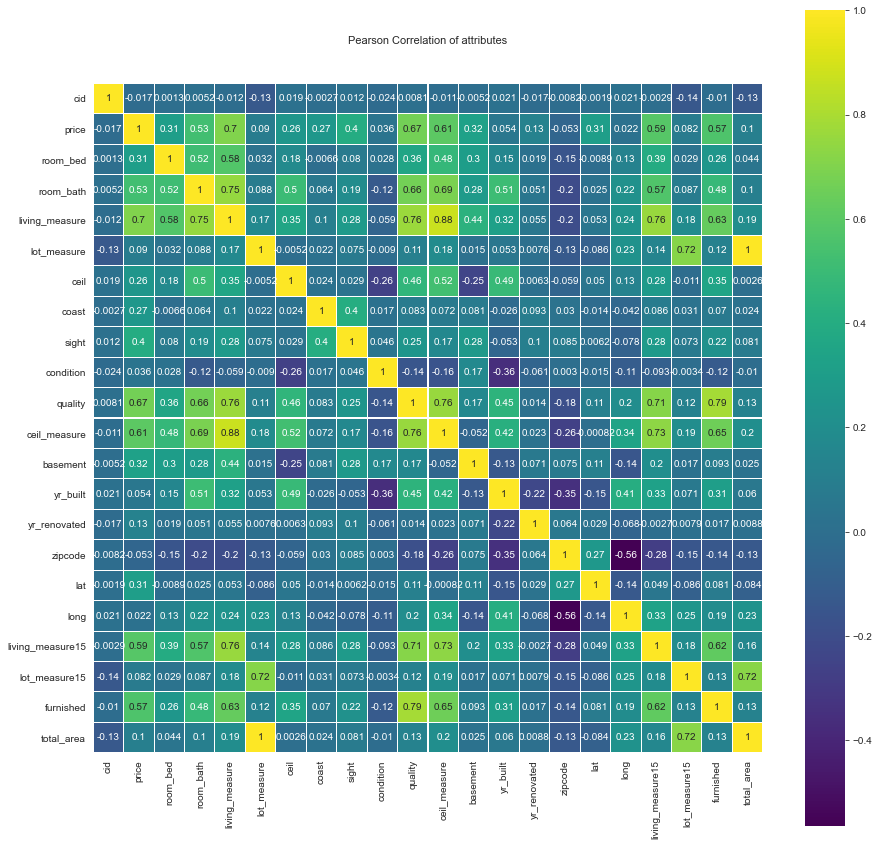

In [13]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=11)
sns.heatmap(caps_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [14]:
caps_df.groupby(["price"]).count()

,cid,dayhours,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,,,,,,,,,,,,,,,,,,,,,
75000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
82000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5570000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6890000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


###### cid column can be dropped as it is of no use in analysis 

In [15]:
caps_df = caps_df.drop(labels = "cid", axis =1)

In [16]:
caps_df.shape

(21613, 22)

In [17]:
caps_df.groupby(["price"]).mean()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,,,,,,,,,,,,,,,,,,,,
75000,1.0,0.00,670.0,43377.0,1.0,0.0,0.0,3.0,3.0,670.0,0.0,1966.0,0.0,98022.0,47.2638,-121.906,1160.0,42882.0,0.0,44047.0
78000,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,1942.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0,0.0,17124.0
80000,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,1912.0,0.0,98014.0,47.6499,-121.909,1200.0,7500.0,0.0,5480.0
81000,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,1943.0,0.0,98168.0,47.4808,-122.315,860.0,9000.0,0.0,10705.0
82000,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,1954.0,0.0,98146.0,47.4987,-122.341,1140.0,11250.0,0.0,11286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,12.0,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0,1.0,31985.0
5570000,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0,1.0,44269.0
6890000,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0,1.0,41264.0


###### Train and Test split the given data

In [18]:
from scipy.stats import zscore
x=caps_df[["room_bed","room_bath","quality","living_measure","lot_measure","ceil_measure","yr_built","lat","living_measure15","lot_measure15","total_area"]]
y=caps_df["price"]
X  = x.apply(zscore)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

b1= regression_model.coef_
b0=regression_model.intercept_
print("b1 is: {} and b0 is : {}".format(b1, b0))

b1 is: [-4.17503138e+04  3.92973116e+04  1.27826163e+05  1.66532533e+16
  7.51040455e+17 -2.01784270e+03 -9.95087327e+04  7.07925815e+04
  2.28780561e+04 -1.08212056e+04 -7.54096976e+17] and b0 is : 540402.7906078297


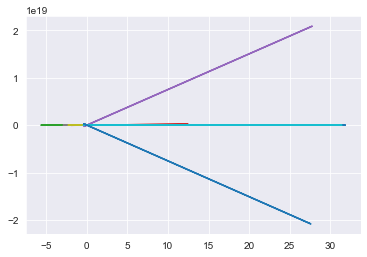

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

###### Model the given data

In [22]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#mse = mean_squared_error(y_test, y_pred)
#rms=sqrt(mse)
#r2score = r2_score(y_test,y_pred)
#print("Root Mean sq error  is {} and R2 error is {}".format(rms, r2score))



def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data
    
    sse = np.sum(pred - y_test)#sum of squares estimator
    
    tss = np.sum(pred - np.mean(pred)**2) #total sum of squares
    
    r2 = 1 - sse / tss
    
    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    print("r2 :",r2)
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    
    
    rmsle = sqrt(metrics.mean_squared_log_error(np.abs(y_test), np.abs(pred)))  # Root mean squared log error (since the numbers are huge)
    
    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation across 3 metrics
    
    r2_cv =  np.mean(r2 in cv['test_r2'])
    
       
    rmse_cv = np.mean([sqrt(rmse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    
    rmsle_cv = np.mean([sqrt(rmsle) for msle in cv['test_msle']]) # mean RMSLE
    
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return r2, rmse, rmsle, r2_cv, rmse_cv, rmsle_cv, duration, pred  # return all the metrics along with predictions

In [23]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
lr = LinearRegression()        
dt = DecisionTreeRegressor(random_state=1,min_samples_split=50,min_samples_leaf=50)   
#Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

diab_model = GaussianNB()
diab_model.fit(X_train, y_train.ravel())
#br = BaggingRegressor(random_state=1)
#rf = RandomForestRegressor(random_state=1, n_estimators=100)  # specifying n_estimators to avoid "future warnings"
#gb = GradientBoostingRegressor(random_state=1, n_estimators=100)


result = {}   # Create an empty dictionary to later use to store metrics of each of the models


# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
#for model, name  in zip([lr, dt, br, rf, gb], ['Linear Regression', 'Decision Tree',
 #                                                   'Bagging Ensemble', 'Random Forest', 'Gradient Boost Ensemble']):

for model, name  in zip([lr, dt, logreg,diab_model], ['Linear Regression', 'Decision Tree',
                                                    'Logistic Regression','NaiveBayes']):

    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key


r2 : 0.668873410371231
r2 : 0.7033800285312959
r2 : 0.6028974352802823
r2 : 0.48742324971799644


In [24]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'MSE', 'MSLE', 'R2 CV', 'RMSE CV', 'RMSLE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,R Squared,MSE,MSLE,R2 CV,RMSE CV,RMSLE CV,Elapsed
Model,,,,,,,
Linear Regression,0.668873,212205.374657,0.408392,0.0,460.657546,0.639056,0.114007
Decision Tree,0.70338,200844.316074,0.232681,0.0,448.156575,0.48237,0.979095
Logistic Regression,0.602897,232386.394163,0.296398,0.0,482.06472,0.544424,3306.111399
NaiveBayes,0.487423,264021.201388,0.378906,0.0,513.829934,0.615554,7.770587


In [25]:
regression_model.score(X_train, y_train)

0.6482564133700873

In [26]:
regression_model.score(X_test, y_test)

0.668873410371231

###### Before tuning the model, the accuracy score for the Decision Tree is 70%

###### Detecting Outliers


On Training Data:
LOF ROC:1.0, precision @ rank n:1.0

On Test Data:
LOF ROC:1.0, precision @ rank n:1.0


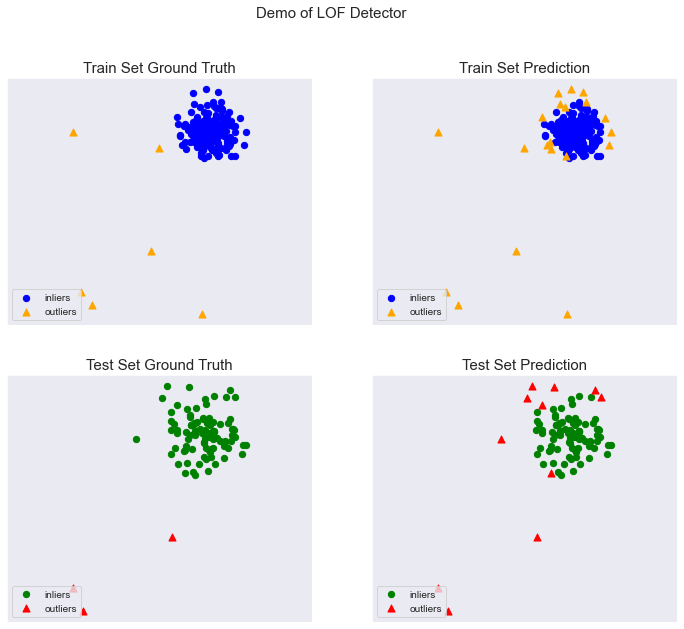

In [51]:
if __name__ == "__main__":
    contamination = 0.03  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train LOF detector Local Outlier Factor
    clf_name = 'LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

 Local Outlier Fraction detects the outliers with the given dataset and the Visualization of the data points shown. 

Text(0, 0.5, 'F2')

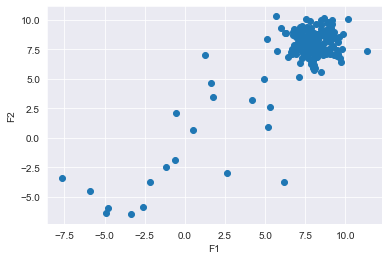

In [48]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers
#generate random data
X_train, y_train = generate_data(n_train=200,train_only=True,n_features=2)
#by default the outlier fraction
outlier_fraction = 0.003 # percentage of outliers
#store outliers, and inliers
x_outliers, x_inliers = get_outliers_inliers(X_train, y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)
#create a meshgrid
xx, yy = np.meshgrid(np.linspace(-10,10,200), np.linspace(-10,10,200))

#scatter plot
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')


In [49]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

No of Errors :  Angle-based Outlier Detector (ABOD) 20
threshold :  0.0003157042393576453
No of Errors :  K Nearest Neighbors (KNN) 19
threshold :  -5.976156862073896


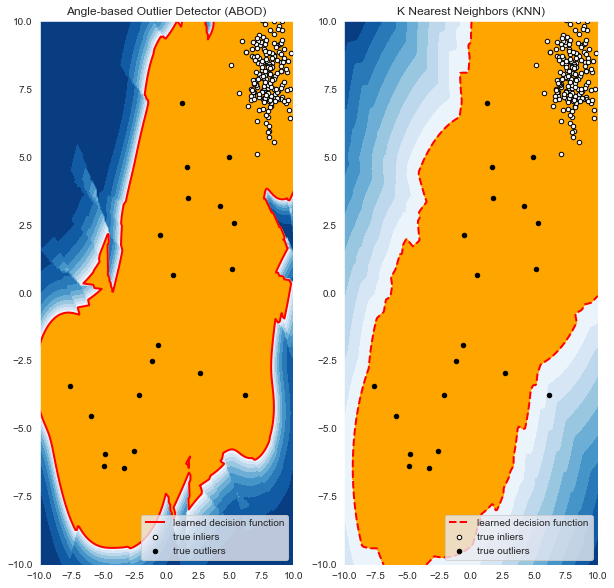

In [50]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)
    print("threshold : ",threshold)
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

###### ABOD, KNN outlier detectors detect the outliers from the given dataset and the threshholds are 0.0003157042393576453 and -5.976156862073896